### **1. Trabajando con DataFrame.**

### **Introducción**

En este documento se presenta un análisis exploratorio de datos usando como guía la metodología CRISP-DM, siendo este uno de los modelos más importantes que muchas empresas y profesionales siguen cuando trabajan con minería de datos. Lo interesante de CRISP-DM es que no se diseñó desde la teoría pura, sino que surgió desde la práctica, con base en proyectos reales en distintas industrias (Chapman et al., 2000). Esa experiencia práctica es justamente lo que la hace tan útil y adaptable.

El proceso está dividido en seis etapas principales: comprensión del negocio, comprensión de los datos, preparación de los datos, modelado, evaluación y despliegue. Aunque en papel parecen pasos ordenados, en realidad el trabajo con datos es mucho más dinámico y suele requerir ir y volver entre etapas según lo que se va encontrando en el análisis de los datos.

Para este análisis nos enfocamos especialmente en las dos primeras fases: la comprensión del negocio y la comprensión de los datos. ¿Por qué? Porque antes de aplicar cualquier técnica sofisticada, hay que tener claro qué problema se quiere resolver y qué tipo de datos tenemos en las manos. Saltarse este entendimiento inicial puede llevar a soluciones técnicamente correctas, pero completamente desconectadas de lo que se necesita en la realidad.







---

**Celda 1: Subida de Archivos**

En esta celda vemos el código que nos permite subir archivos al entorno de ejecución de Google Colab, facilitando la carga de datos externos para el análisis.

In [1]:
from google.colab import files
files.upload()

Saving 2.2.2 notas.txt to 2.2.2 notas.txt


{'2.2.2 notas.txt': b'4.7,0.0,0.1\r\n3.9,1.0,0.3\r\n1.5,0.0,0.0\r\n5.0,0.0,0.1\r\n3.9,0.0,0.9\r\n4.0,0.0,0.9\r\n2.9,0.0,0.4\r\n1.8,0.0,0.1\r\n1.8,0.0,0.6\r\n1.2,0.0,0.4\r\n3.0,1.0,0.9\r\n2.4,1.0,0.9\r\n1.3,0.0,0.0\r\n2.4,0.0,0.3\r\n1.2,0.0,0.4\r\n1.3,0.0,0.1\r\n1.2,1.0,0.8\r\n6.5,0.0,0.3\r\n3.7,1.0,0.2\r\n5.4,0.0,0.5\r\n4.4,1.0,0.9\r\n5.2,1.0,0.9\r\n1.2,0.0,0.7\r\n4.4,0.0,0.9\r\n3.7,0.0,0.4\r\n1.5,1.0,0.5\r\n4.4,0.0,0.4\r\n2.2,0.0,0.6\r\n3.3,0.0,0.5\r\n1.5,0.0,0.1\r\n5.1,0.0,0.0\r\n4.1,0.0,0.4\r\n5.0,0.0,0.7\r\n4.8,1.0,0.2\r\n4.3,1.0,0.8\r\n2.7,1.0,0.8\r\n6.2,1.0,0.6\r\n4.5,1.0,0.8\r\n3.1,1.0,0.8\r\n6.0,0.0,0.2\r\n5.9,0.0,0.8\r\n6.2,1.0,0.9\r\n6.5,0.0,0.6\r\n3.3,0.0,0.0\r\n2.8,1.0,0.6\r\n6.3,1.0,1.0\r\n4.0,1.0,0.9\r\n2.8,0.0,0.5\r\n1.1,1.0,0.1\r\n5.6,0.0,0.4\r\n4.1,1.0,1.0\r\n3.2,1.0,1.0\r\n1.1,0.0,0.6\r\n5.9,1.0,0.1\r\n6.9,0.0,0.9\r\n5.4,0.0,0.9\r\n1.6,0.0,0.7\r\n3.7,1.0,0.7\r\n6.2,1.0,0.1\r\n4.8,1.0,0.8\r\n4.5,0.0,1.0\r\n2.2,0.0,0.6\r\n2.2,1.0,0.8\r\n2.9,0.0,0.6\r\n6.0,0.0,0.9\r\n3.6

---
**Celda 2: Importación de Librerías**

En esta celda vemos la importación de las bibliotecas para el proyecto:

1.   Pandas para el manejo y análisis de datos
2.   NumPy para operaciones numéricas



In [2]:
import pandas as pd
import numpy as np

---

**Celda 3: Carga del Archivo de Datos**

En esta celda cargamos el archivo '2.2.2 notas.txt' en un DataFrame con columnas específicas: ***nota, género y asistencia***, luego de esto desplegamos el DataFrame verificando la correcta carga inicial.

In [3]:
studentsHeader = ['nota', 'genero', 'asistencia']
df_students = pd.read_csv('2.2.2 notas.txt', sep=',', header=None, names=studentsHeader)
df_students

,nota,genero,asistencia
0,4.7,0.0,0.1
1,3.9,1.0,0.3
2,1.5,0.0,0.0
3,5.0,0.0,0.1
4,3.9,0.0,0.9
...,...,...,...
995,6.2,0.0,0.1
996,6.3,0.0,0.1
997,6.7,0.0,0.3
998,7.0,0.0,0.8


---

**Celda 4: Agrupación por Género**

En la celda agrupamos y contamos los registros según el género, lo cual nos proporciona una visión sobre la distribución de los datos segmentada por género.

In [4]:
df_students.groupby("genero").size()

,0
genero,
0.0,505
1.0,495


---

**Celda 5: Agrupación por Notas**

En la celda agrupamos y contamos la frecuencia de cada nota obtenida por los estudiantes, mostrandonos la distribución de las notas de los estudiantes.

In [5]:
df_students.groupby('nota').size()

,0
nota,
1.0,10
1.1,18
1.2,19
1.3,18
1.4,14
...,...
6.6,16
6.7,12
6.8,13


---

**Celda 6: Descripción Estadística de los datos**

Llama a `df_students.describe()` para generar una tabla con estadísticos resumidos (media, desviación estándar, cuartiles, etc.) de las variables numéricas. Estos datos estadísticos proporcionan una primera idea sobre la tendencia central y la dispersión de los datos, fundamentales en la fase de *Comprensión de los Datos*.

In [6]:
df_students.describe()

,nota,genero,asistencia
count,1000.000000,1000.000000,1000.000000
mean,3.978800,0.495000,0.505800
std,1.748407,0.500225,0.297144
min,1.000000,0.000000,0.000000
25%,2.400000,0.000000,0.200000
50%,3.900000,0.000000,0.500000
75%,5.600000,1.000000,0.800000
max,7.000000,1.000000,1.000000


---
**Celda 7: Creación de un Diccionario de Género**

En la celda creamos un diccionario de genero lo cual nos permite transformar la representación numérica de los datos en etiquetas interpretables lo cual nos transformara.

1.   El Valor 0 en la Etiqueta ***Femenino***
2.   El Valor 1 en la Etiqueta ***Masculino***



In [7]:
d_genero = { 0: 'Femenino', 1: 'Masculino'}

---
**Celda 8: Agregamos Diccionario de Genero al DataFrame**

En la celda generamos un código lo cual nos permite agregar una nueva columna en el DataFrame con etiquetas descriptivas del género.

In [8]:
df_students['desc_genero'] = df_students['genero'].map(d_genero)

---
**Celda 9: Inspección visual del DataFrame**

Muestra el DataFrame en pantalla. Es útil para realizar una inspección visual rápida y confirmar que los datos fueron cargados correctamente, que las columnas aparecen en el orden previsto y que no existen valores inesperados en las primeras y últimas filas.

In [9]:
df_students

,nota,genero,asistencia,desc_genero
0,4.7,0.0,0.1,Femenino
1,3.9,1.0,0.3,Masculino
2,1.5,0.0,0.0,Femenino
3,5.0,0.0,0.1,Femenino
4,3.9,0.0,0.9,Femenino
...,...,...,...,...
995,6.2,0.0,0.1,Femenino
996,6.3,0.0,0.1,Femenino
997,6.7,0.0,0.3,Femenino
998,7.0,0.0,0.8,Femenino


---
**Celda 10: Conteo de registros por género**

Aplica el código para contar cuántos registros pertenecen a cada género. Este recuento ayuda a identificar posibles desbalances en la variable de descripción de género (por ejemplo, muchos registros más de un género que de otro) que podrían influir en análisis posteriores o requerir técnicas de muestreo.

In [10]:
df_students.groupby('desc_genero').size()

,0
desc_genero,
Femenino,505
Masculino,495


---
**Celda 11: Estadísticas descriptivas globales**

Llama a `df_students.describe()` para generar una tabla con estadísticos resumidos (media, desviación estándar, cuartiles, etc.) de las variables numéricas. Estos estadísticos proporcionan una primera idea sobre la tendencia central y la dispersión de los datos, fundamentales en la fase de *Comprensión de los Datos*.

acá si nos damos cuenta aunque agregamos la variable cualitativa o categórica de género al ser esta una variable no numérica no aparece en este análisis estadístico.

In [11]:
df_students.describe()

,nota,genero,asistencia
count,1000.000000,1000.000000,1000.000000
mean,3.978800,0.495000,0.505800
std,1.748407,0.500225,0.297144
min,1.000000,0.000000,0.000000
25%,2.400000,0.000000,0.200000
50%,3.900000,0.000000,0.500000
75%,5.600000,1.000000,0.800000
max,7.000000,1.000000,1.000000


---
**Celda 12: Vista de los primeros 10 registros**

Utiliza `df_students.head(10)` para visualizar las primeras diez filas del conjunto. Esto permite verificar valores atípicos o errores de digitación en los registros iniciales y comprender la estructura de la tabla.

In [12]:
df_students.head(10)

,nota,genero,asistencia,desc_genero
0,4.7,0.0,0.1,Femenino
1,3.9,1.0,0.3,Masculino
2,1.5,0.0,0.0,Femenino
3,5.0,0.0,0.1,Femenino
4,3.9,0.0,0.9,Femenino
5,4.0,0.0,0.9,Femenino
6,2.9,0.0,0.4,Femenino
7,1.8,0.0,0.1,Femenino
8,1.8,0.0,0.6,Femenino
9,1.2,0.0,0.4,Femenino


---
**Celda 13: Listado de nombres de columnas**

En la celda invoca `df_students.columns` para listar los nombres de las columnas. Conocer el esquema del DataFrame es esencial antes de diseñar transformaciones o seleccionar variables para el modelado.

In [13]:
df_students.columns

Index(['nota', 'genero', 'asistencia', 'desc_genero'], dtype='object')

---
**Celda 14: Obtención de valores únicos de 'nota'**

El código detallado en la celda nos devuelve una lista de los valores únicos o distintos presentes en la columna de nota. Sirve para analizar la variedad de calificaciones y detectar valores extremos o etiquetas inesperadas.

In [14]:
pd.unique(df_students['nota'])

array([4.7, 3.9, 1.5, 5. , 4. , 2.9, 1.8, 1.2, 3. , 2.4, 1.3, 6.5, 3.7,
       5.4, 4.4, 5.2, 2.2, 3.3, 5.1, 4.1, 4.8, 4.3, 2.7, 6.2, 4.5, 3.1,
       6. , 5.9, 2.8, 6.3, 1.1, 5.6, 3.2, 6.9, 1.6, 3.6, 2. , 2.3, 6.8,
       5.3, 5.8, 5.5, 1.9, 6.6, 6.1, 6.7, 7. , 3.4, 3.8, 6.4, 4.6, 1.7,
       2.6, 3.5, 2.5, 1.4, 2.1, 1. , 5.7, 4.2, 4.9])

### **1.1. Diferencias entre len() y nunique().**

---
**Celda 15: Extracción de la Serie de notas**

el código en la celda asigna la columna 'nota' a `lstNotas` y la muestra en la pantalla. Extraer la Serie por separado facilita operaciones estadísticas o gráficas específicas sin necesidad de referirse a todo el DataFrame.

La Serie de notas sigue teniendo los mismos 1000 registros que el DataFrame original pero solo con una columna y el tipo de esta es al igual que en el DataFrame ***float64***

In [15]:
lstNotas = df_students['nota']
lstNotas

,nota
0,4.7
1,3.9
2,1.5
3,5.0
4,3.9
...,...
995,6.2
996,6.3
997,6.7
998,7.0


---
**Celda 16: Conteo total y número de calificaciones distintas**

En el código a continuación nos imprime la longitud total de lstNotas junto al número de valores únicos (nunique()). Esta combinación ofrece una visión inmediata del tamaño de la muestra y de la diversidad de calificaciones.
Al mirar los resultados de este código nos ayudara a responder la pregunta planteada en el 1.1, que diferencias hay entre Len() y nunique() y esto es básicamente que nos responde cada una de las funciones a continuación una breve explicación:

•	len() responde: “¿Cuántos elementos tengo en total?”

•	nunique() responde: “¿Cuántos valores diferentes existen?

Elegir uno u otro depende de si te interesa el tamaño bruto de la colección o la diversidad de los datos ambos muy importantes para el análisis de los datos.


In [16]:
print(len(lstNotas))
print(df_students['nota'].nunique())

1000
61


---
**Celda 17: Resumen estadístico detallado de la columna 'nota'**

La celda a continuación nos genera el cálculo y muestra máximo, mínimo, promedio, desviación estándar y conteo de 'nota'. Estos indicadores refinan la comprensión sobre el rendimiento general de los estudiantes y sirven de punto de partida para detectar potenciales valores atípicos.

In [17]:
print("Max :", df_students['nota'].max())
print("Min :", df_students['nota'].min())
print("Promedio :", df_students['nota'].mean())
print("Desviación estándar :", df_students['nota'].std())
print("Count :", df_students['nota'].count())

Max : 7.0
Min : 1.0
Promedio : 3.9788
Desviación estándar : 1.7484071286423788
Count : 1000


---
**Celda 18: Descripción estadística agrupada por género**

En la siguiente celda se crea el DataFrame grupo_genero usando groupby('desc_genero') y luego invoca .describe() para obtener la descripción estadística separada por género. Con ello se pueden comparar medidas de tendencia y dispersión entre grupos.

En detalle nos mostrara una matriz con los detalles estadísticos donde en las filas tendremos la variable descriptiva de género y en las columnas la descripción estadística separada por cada una de las variables numéricas como son nota, género y asistencia


In [18]:
grupo_genero = df_students.groupby('desc_genero')
grupo_genero.describe()

nota                                              genero       \
             count      mean       std  min  25%  50%  75%  max  count mean   
desc_genero                                                                   
Femenino     505.0  3.967129  1.777513  1.0  2.3  4.0  5.5  7.0  505.0  0.0   
Masculino    495.0  3.990707  1.719922  1.0  2.5  3.9  5.6  7.0  495.0  1.0   

             ...           asistencia                                          \
             ...  75%  max      count      mean       std  min  25%  50%  75%   
desc_genero  ...                                                                
Femenino     ...  0.0  0.0      505.0  0.498416  0.291747  0.0  0.3  0.5  0.7   
Masculino    ...  1.0  1.0      495.0  0.513333  0.302660  0.0  0.2  0.5  0.8   

                  
             max  
desc_genero       
Femenino     1.0  
Masculino    1.0  

[2 rows x 24 columns]

---
**Celda 19: Descripción estadística agrupada por género**

En la celda se ejecuta grupo_genero.mean() para obtener la media de todas las columnas numéricas por género. Particularmente, la nota media permite detectar diferencias de rendimiento entre los grupos notando que el promedio masculino es levemente superior que el femenino, además podemos ver que la asistencia es levemente superior en el género masculino a primera vista nos permitiría generar una relación que a mejor media de asistencia mejor media de notas, pero es solo una observación preliminar de los datos.

In [19]:
# Regresa la media de cada columna numérica por genero
grupo_genero.mean()

,nota,genero,asistencia
desc_genero,,,
Femenino,3.967129,0.0,0.498416
Masculino,3.990707,1.0,0.513333


---
**Celda 20: Verificación de los tipos de datos**

El código a continuación lista el tipo de dato de cada columna. Verificar los tipos evita errores en transformaciones y asegura que las funciones estadísticas trabajen sobre formatos adecuados.

In [20]:
df_students.dtypes

,0
nota,float64
genero,float64
asistencia,float64
desc_genero,object


---
**Celda 21: Dimensiones del DataFrame**

El código en la celda nos devuelve una tupla (filas, columnas) que cuantifica el tamaño del dataset. Conocer estas dimensiones es clave al planificar recursos de cómputo y particiones de entrenamiento/prueba.

In [21]:
df_students.shape

(1000, 4)

---
**Celda 22: Vista de los últimos registros**

El código en la celda nos devuelve una muestra de las últimas filas, útil para detectar registros incompletos añadidos al final o para confirmar consistencia en todo el archivo fuente.

In [22]:
df_students.tail()

,nota,genero,asistencia,desc_genero
995,6.2,0.0,0.1,Femenino
996,6.3,0.0,0.1,Femenino
997,6.7,0.0,0.3,Femenino
998,7.0,0.0,0.8,Femenino
999,4.2,0.0,0.3,Femenino


---
**Celda 23: Almacenamiento del promedio de notas por género**

Agrupa por género y calcula la media de la nota, almacenando el resultado en `avg_by_gender`. Conservar esta Serie facilita representar en gráficos de barras o tablas comparativas el rendimiento promedio.

In [23]:
avg_by_gender = df_students.groupby('desc_genero')['nota'].mean()
avg_by_gender

,nota
desc_genero,
Femenino,3.967129
Masculino,3.990707


---
**Celda 24: Determinación de la nota máxima por género**

El código se comporta de forma similar a la celda anterior, pero ahora se calcula la nota máxima por género (`max()`). Esta métrica ayuda a identificar estudiantes con desempeño sobresaliente dentro de cada grupo.

In [24]:
result = df_students.groupby('desc_genero')['nota'].max()
result

,nota
desc_genero,
Femenino,7.0
Masculino,7.0


**Celda 25: Histograma con una curva de densidad superpuesta.**

La curva sugiere que la distribución tiene dos picos (es bimodal), con concentraciones de notas alrededor de 1-2 y 6-7, y menos estudiantes con notas intermedias (alrededor de 4-5).

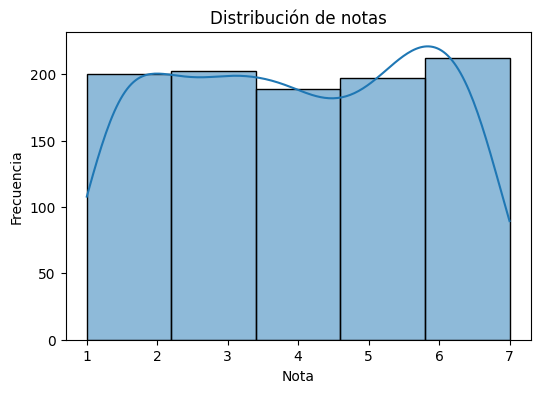

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
studentsHeader = ['nota', 'genero', 'asistencia']
df = pd.read_csv('2.2.2 notas.txt', sep=',', header=None, names=studentsHeader)
df['desc_genero'] = df['genero'].map({0: 'Femenino', 1: 'Masculino'})
df.head()
plt.figure(figsize=(6,4))
sns.histplot(df['nota'], bins=5, kde=True)
plt.title('Distribución de notas')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

**Celda 26: Grafico de dispersión.**

En el grafico de dispersión no se observa correlación entre notas y asistencia, tampoco una distribución uniforme respecto al género.

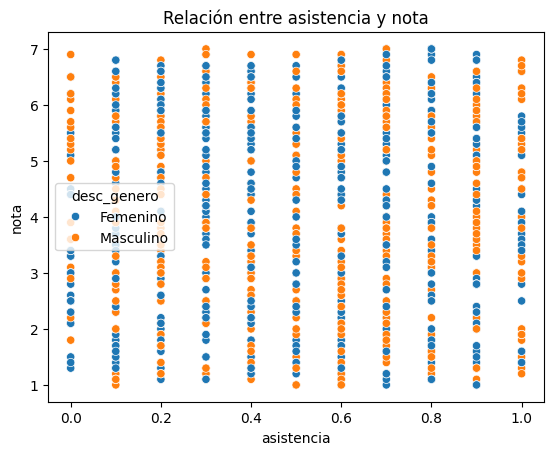

In [26]:
sns.scatterplot(x='asistencia', y='nota', hue='desc_genero', data=df)
plt.title('Relación entre asistencia y nota')
plt.show()

**Celda 27: Método del codo para determinar el número óptimo de clusters y aplicación en base al resultado K=3.**

El "codo" parece estar alrededor de 3 clusters, porque después de este punto la reducción en la inercia es menos significativa. Esto sugiere que 3 es un número razonable de clusters para agrupar los datos.

El objetivo es determinar cuántos grupos naturales existen en los datos. Por ejemplo, podrías estar buscando patrones como "estudiantes con alta asistencia y buenas notas", "estudiantes con baja asistencia y malas notas"



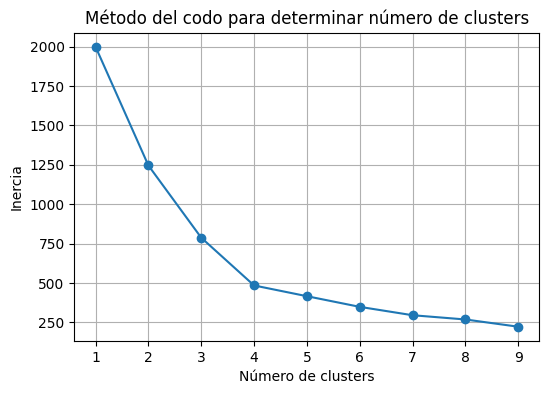

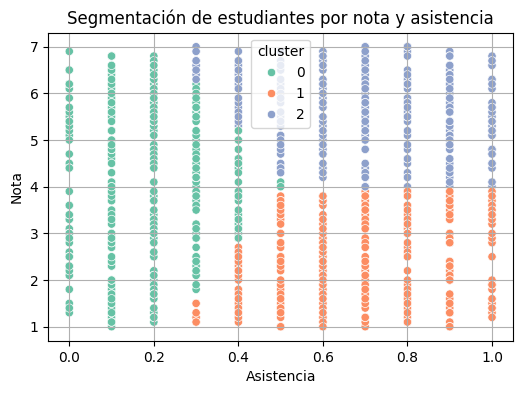

Resumen por cluster:
             nota  asistencia
cluster                      
0        3.926216    0.188919
1        2.361290    0.685484
2        5.606562    0.698125


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar los datos
df = pd.read_csv('2.2.2 notas.txt', sep=',', header=None, names=['nota', 'genero', 'asistencia'])

# Escalar variables (nota y asistencia)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['nota', 'asistencia']])

# Método del codo para determinar el número óptimo de clusters
inertia = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

# Graficar el método del codo
plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Método del codo para determinar número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Aplicar KMeans con 3 clusters (ajustable según el gráfico anterior)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualización de clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='asistencia', y='nota', hue='cluster', palette='Set2')
plt.title('Segmentación de estudiantes por nota y asistencia')
plt.xlabel('Asistencia')
plt.ylabel('Nota')
plt.grid(True)
plt.show()

# Promedios por cluster
print("Resumen por cluster:")
print(df.groupby('cluster')[['nota', 'asistencia']].mean())

**Celda 28: Interpretación de los resultados**

Para entender mejor los diferentes perfiles de estudiantes, realizamos un análisis de segmentación (clustering) basado en sus notas y niveles de asistencia. El primer gráfico clave, la "Dispersión Nota vs Asistencia por Clúster", visualiza los tres grupos identificados: un clúster (0) agrupa a estudiantes con bajo rendimiento y baja asistencia, otro (Clúster 1) a aquellos con bajo rendimiento, pero alta asistencia, y un tercer clúster (2) reúne a los estudiantes de alto rendimiento y alta asistencia. Para complementar esta segmentación, se utilizaron dos gráficos adicionales. La "Distribución de Género por Clúster" se empleó para analizar si la pertenencia a un segmento estaba influenciada por el género. Por otro lado, la "Clasificación Alto/Bajo Rendimiento por Clúster" sirvió para validar la interpretación de los segmentos, confirmando que el Clúster 2 corresponde efectivamente al grupo de "Alto" rendimiento, mientras que los Clústeres 0 y 1 agrupan mayoritariamente a los de "Bajo" rendimiento. Estos análisis proporcionan el contexto para las conclusiones detalladas sobre los perfiles estudiantiles encontrados.

**Gráfico 1 (Dispersión Nota vs Asistencia por Clúster):**
El análisis de K-Means identifica eficazmente tres segmentos de estudiantes distintos basados en sus notas y asistencia: un grupo de bajo rendimiento y baja asistencia (Clúster 0), un grupo de bajo rendimiento, pero alta asistencia (Clúster 1), y un grupo de alto rendimiento y alta asistencia (Clúster 2).

**Gráfico 2 (Distribución de Género por Clúster):**
La distribución de género es relativamente homogénea entre los tres clústeres, indicando que, en este conjunto de datos, el género no es un factor determinante para pertenecer a uno de los segmentos de rendimiento/asistencia identificados.

**Gráfico 3 (Clasificación Alto/Bajo Rendimiento por Clúster):**
Este gráfico valida la caracterización de los clústeres del gráfico de dispersión, confirmando que los Clústeres 0 y 1 agrupan mayoritariamente a estudiantes de "Bajo" rendimiento, mientras que el Clúster 2 agrupa predominantemente a los de "Alto" rendimiento, reforzando la coherencia de la segmentación.


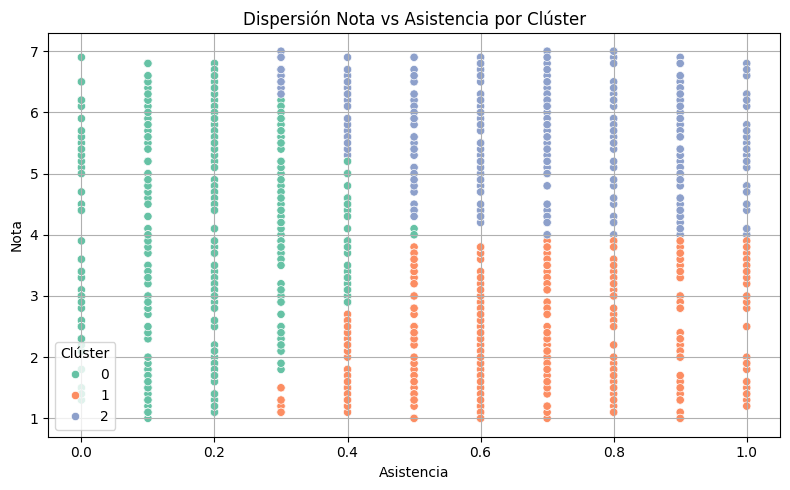

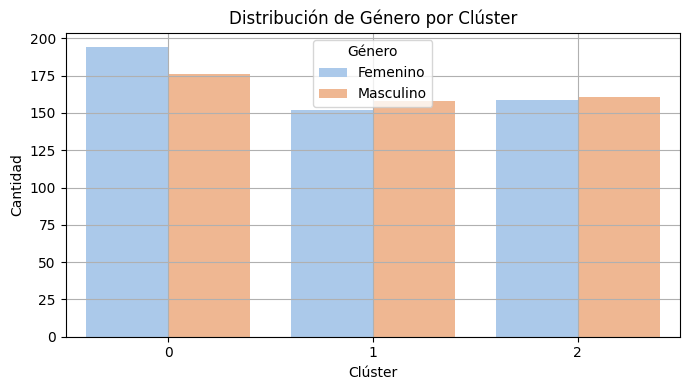

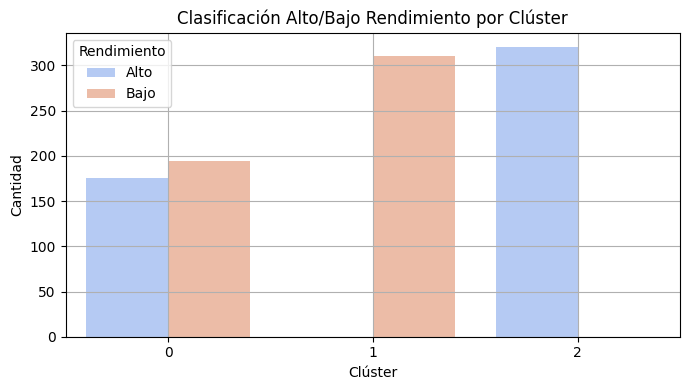

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar datos desde el archivo TXT
df = pd.read_csv('2.2.2 notas.txt', sep=',', header=None, names=['nota', 'genero', 'asistencia'])

# Escalar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['nota', 'asistencia']])

# Aplicar KMeans con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Variables adicionales para visualización
df['desc_genero'] = df['genero'].map({0: 'Femenino', 1: 'Masculino'})
df['rendimiento'] = df['nota'].apply(lambda x: 'Alto' if x >= 4.0 else 'Bajo')

# 📊 1. Dispersión Nota vs Asistencia por Clúster
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='asistencia', y='nota', hue='cluster', palette='Set2')
plt.title('Dispersión Nota vs Asistencia por Clúster')
plt.xlabel('Asistencia')
plt.ylabel('Nota')
plt.grid(True)
plt.legend(title='Clúster')
plt.tight_layout()
plt.show()

# 👤 2. Distribución de género por Clúster
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='cluster', hue='desc_genero', palette='pastel')
plt.title('Distribución de Género por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.grid(True)
plt.tight_layout()
plt.show()

# 🎯 3. Clasificación Alto/Bajo rendimiento por Clúster
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='cluster', hue='rendimiento', palette='coolwarm')
plt.title('Clasificación Alto/Bajo Rendimiento por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad')
plt.legend(title='Rendimiento')
plt.grid(True)
plt.tight_layout()
plt.show()


### **Conclusión**

Para concluir, es fundamental destacar que la lección más importante de este análisis es la necesidad de conocer a fondo los datos antes de siquiera considerar la construcción de modelos complejos (Chapman et al., 2000). Intentar modelar sin una comprensión clara de la información carece de sentido y difícilmente conducirá a resultados útiles.

En general, para abordar el análisis partimos determinando el contexto de la información, identificando las variables y su tipo de dato, asegurando que cada paso estuviera conectado con objetivos claros y necesidades reales del ámbito educativo (Chapman et al., 2000). No se trataba solo de procesar números, sino de transformar esas cifras y estadísticas en una historia coherente que permitiera plantear las preguntas correctas sobre lo que estaba sucediendo (Provost & Fawcett, 2013). Siguiendo esta línea, se examinaron los datos desde múltiples perspectivas, buscando patrones ocultos y asegurándose de captar todas las facetas importantes de la información disponible (Han, Kamber, & Pei, 2012). De esta manera pudimos realizar técnicas para organizar la información y además evaluar desde qué perspectiva podríamos abordar estudios específicos; por ejemplo, al tomar como referencia las variables como el género, asistencia y notas, se logró calcular valores promedio y máximos, agregando un contexto a esta información y permitiéndonos vislumbrar pistas valiosas o ideas para mejorar procesos educativos en base a resultados adquiridos, detectando desequilibrios en el sistema o hipótesis sobre por qué algunos estudiantes rinden de forma muy diferente a otros.

Esta certeza es la base indispensable sobre la que se puede construir cualquier esfuerzo futuro, ya sea para predecir resultados o para diseñar intervenciones efectivas. Identificar estos grupos va más allá de una simple descripción; ofrece arquetipos claros que sugieren la necesidad de pensar en ayudas o intervenciones diferentes para cada tipo de estudiante, en lugar de aplicar la misma solución para todos. Además, algo que también destacó fue la forma en que se distribuían las calificaciones. En lugar de agruparse la mayoría en torno a un punto medio, se observaron dos grandes grupos: uno con calificaciones más bajas y otro con calificaciones más altas. Esto generó preguntas importantes: ¿Por qué existe esta división tan marcada? ¿Qué sucede con esos estudiantes que asisten a clase fielmente pero siguen estancados en el grupo de bajas calificaciones? ¿Es una cuestión de metodologías pedagógicas inadecuadas, barreras socioeconómicas no detectadas, o existen sesgos relacionados con el género u otros atributos?

Finalmente, las representaciones visuales, como los gráficos que mostraban los grupos de estudiantes, las distribuciones por género o los mapas de rendimiento, no eran simples ilustraciones. Funcionaron como herramientas e hicieron tangibles las tendencias escondidas en los números, poniendo el foco sobre las áreas que más atención necesitan y ayudándonos a identificar de forma muy clara dónde estaban los patrones y los posibles focos de desigualdad o ineficiencia. Con esta comprensión sólida tenemos el punto de partida esencial que funciona como una hoja de ruta informada, indicando dónde concentrar la energía y los recursos en las siguientes fases, ya sea para afinar modelos predictivos o para impulsar cambios prácticos que mejoren el entorno educativo analizado y así trabajar en los hechos de inequidad o ineficiencia de la información educacional.

### **Referencias**

*   Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., & Wirth, R. (2000). CRISP-DM 1.0: Step-by-step data mining guide. CRISP-DM Consortium.
*   Provost, F., & Fawcett, T. (2013). Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking. O'Reilly Media.
*   Han, J., Kamber, M., & Pei, J. (2012). Data Mining: Concepts and Techniques (3rd ed.). Morgan Kaufmann Publishers.



